In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score

import time

from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

from subprocess import call, check_call
from IPython.display import Image
import pydot
from sklearn import tree

In [2]:
# pandas settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing Dataset

In [3]:
# reading data train

data = pd.read_csv("data.csv")

In [4]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y
0,0.662810,-0.259196,0,-0.445083,1,0,0.662810,-0.439695,-0.279218,-0.898687,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.665224,-0.259196,0,-0.454841,1,1,-0.665224,-0.439695,-1.016949,-0.898687,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.025001,-0.259196,0,0.088693,1,0,1.025001,-0.439695,-0.859567,-0.898687,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.665224,-0.259196,0,-0.455202,0,0,-0.665224,-0.439695,0.183093,-0.898687,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.423764,1.306414,0,-0.372082,1,0,-0.423764,-0.439695,-0.397255,-0.898687,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Modelling

### Split Data Train & Test

#### 80 : 20

In [5]:
# categorising feature & label

feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']

label   = ['y']

In [6]:
X = data[feature]
y = data['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=89)

### Modeling Preparation

#### Evaluation Method

In [8]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [9]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [10]:
def draw_learning_curve_tree(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = DecisionTreeClassifier(min_samples_split=10,criterion='gini',splitter='best',max_depth=n)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

In [11]:
def draw_learning_curve_forest(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = RandomForestClassifier(criterion='gini',max_depth=None, n_estimators=n)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

### Decision Tree

#### Without Hyperparameter Tuning

In [12]:
start_time = time.time()

tree = DecisionTreeClassifier(max_depth=None,
                                min_samples_split=2,
                                criterion='gini',
                                splitter='best')
tree.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.28696489334106445 ms


In [13]:
ytrain_tree_pred = tree.predict(X_train)
ytest_tree_pred  = tree.predict(X_test)

In [14]:
accuracy_tree_train = accuracy_score(y_train, ytrain_tree_pred)
accuracy_tree_test  = accuracy_score(y_test, ytest_tree_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_tree_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_tree_test)

Accuracy  (Train Set)    : 1.00
Accuracy  (Test Set)     : 0.93


In [15]:
precision_tree_train = precision_score(y_train, ytrain_tree_pred)
precision_tree_test  = precision_score(y_test, ytest_tree_pred)
print("Precision  (Train Set)    : %.2f" % precision_tree_train)
print("Precision  (Test Set)     : %.2f" % precision_tree_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.92


In [68]:
recall_tree_train = recall_score(y_train, ytrain_tree_pred)
recall_tree_test  = recall_score(y_test, ytest_tree_pred)
print("Recall  (Train Set)    : %.2f" % recall_tree_train)
print("Recall  (Test Set)     : %.2f" % recall_tree_test)

Recall  (Train Set)    : 1.00
Recall  (Test Set)     : 0.94


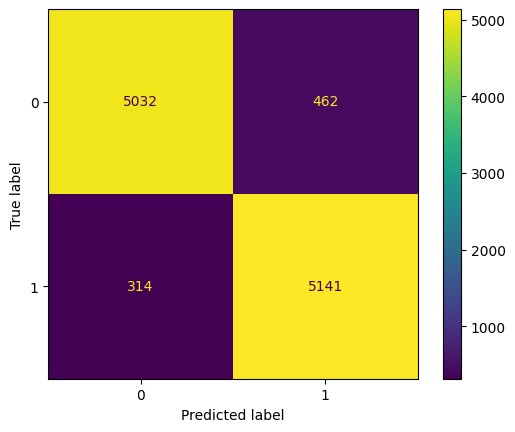

In [16]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_tree_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

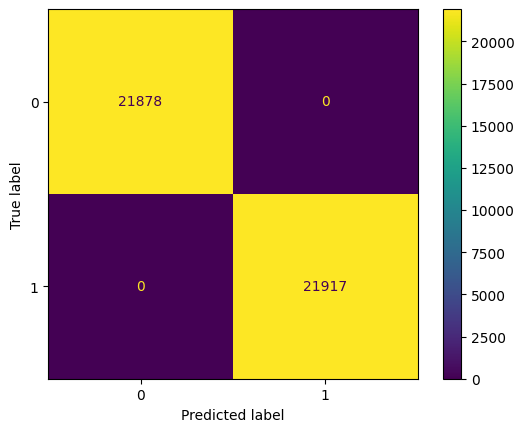

In [17]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_tree_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [18]:
max_depth = [None, 5, 10, 20]
min_samples_split= [2, 5, 10]
param_grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)

In [19]:
start_time = time.time()

tree = DecisionTreeClassifier(criterion='gini',
                                splitter='best')
tree_grid = GridSearchCV(tree, param_grid, cv=10)
tree_grid.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 20.532925128936768 ms


In [20]:
print("\nBest: %f using %s" % (tree_grid.best_score_, tree_grid.best_params_))


Best: 0.928120 using {'max_depth': None, 'min_samples_split': 2}


In [21]:
ytrain_tree_grid_pred = tree_grid.predict(X_train)
ytest_tree_grid_pred  = tree_grid.predict(X_test)

In [22]:
accuracy_tree_grid_train = accuracy_score(y_train, ytrain_tree_grid_pred)
accuracy_tree_grid_test  = accuracy_score(y_test, ytest_tree_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_tree_grid_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_tree_grid_test)

Accuracy  (Train Set)    : 1.00
Accuracy  (Test Set)     : 0.93


In [23]:
precision_tree_grid_train = precision_score(y_train, ytrain_tree_grid_pred)
precision_tree_grid_test  = precision_score(y_test, ytest_tree_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_tree_grid_train)
print("Precision  (Test Set)     : %.2f" % precision_tree_grid_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.92


In [69]:
recall_tree_grid_train = recall_score(y_train, ytrain_tree_grid_pred)
recall_tree_grid_test  = recall_score(y_test, ytest_tree_grid_pred)
print("Recall  (Train Set)    : %.2f" % recall_tree_grid_train)
print("Recall  (Test Set)     : %.2f" % recall_tree_grid_test)

Recall  (Train Set)    : 1.00
Recall  (Test Set)     : 0.94


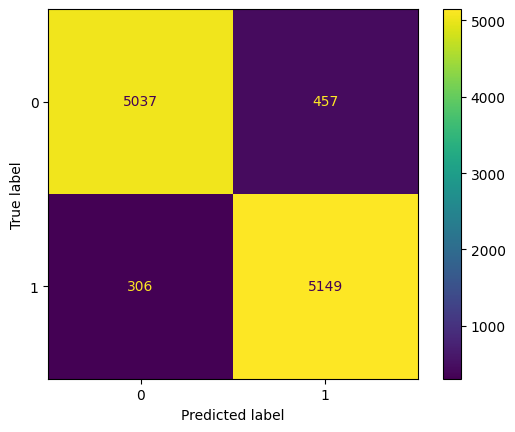

In [24]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_tree_grid_pred, labels=tree_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_grid.classes_)
disp.plot()
plt.show()

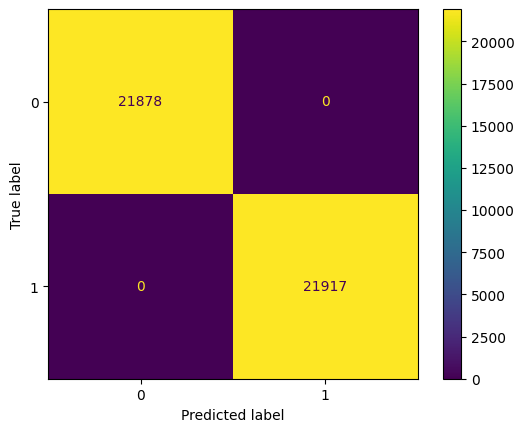

In [25]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_tree_grid_pred, labels=tree_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 1; train: 0.7179589719231898; test: 0.7150326812651547
param value: 11; train: 0.9755381763966418; test: 0.9552402137220272
param value: 21; train: 0.9971785773837315; test: 0.9520835328399251
param value: 32; train: 0.998871057648064; test: 0.9485146032151731
param value: 42; train: 0.9988971973700795; test: 0.9481959821513477
param value: 53; train: 0.9988638699544367; test: 0.9490190782244908
param value: 63; train: 0.9988759127041398; test: 0.9483219757775918
param value: 74; train: 0.9988906666105861; test: 0.9484945830415115
param value: 84; train: 0.9988872307407902; test: 0.949368780607926
param value: 95; train: 0.9988992912172874; test: 0.9482334365595732
param value: 105; train: 0.9989042860022106; test: 0.9487344747724122
param value: 116; train: 0.9988941838150841; test: 0.947402832921307
param value: 126; train: 0.9988703110372071; test: 0.9489421173402398
param value: 137; train: 0.9989019731769581; test: 0.9477587081916211
param value: 147; train: 0.9989004

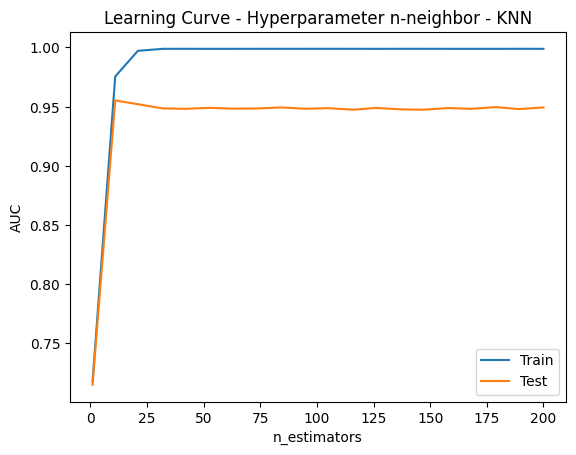

In [26]:
param_values = [int(x) for x in np.linspace(1, 200, 20)]
draw_learning_curve_tree(param_values)

param value: 1; train: 0.7179589719231898; test: 0.7150326812651547
param value: 2; train: 0.7970549271555354; test: 0.7936100777550178
param value: 3; train: 0.8348755918783637; test: 0.8316507267156203
param value: 4; train: 0.864641487080652; test: 0.8604002466485394
param value: 6; train: 0.9149591495623506; test: 0.9068075931179986
param value: 7; train: 0.9333877547302251; test: 0.9255960422786028
param value: 8; train: 0.9454809413334754; test: 0.9377049106482965
param value: 9; train: 0.9561577393620957; test: 0.9442253310585966
param value: 11; train: 0.975544028324197; test: 0.9555179102141925
param value: 12; train: 0.9804966401614668; test: 0.9550531585661151
param value: 13; train: 0.9848132135840149; test: 0.9542250574495567
param value: 14; train: 0.9880309165966726; test: 0.9541434251914512
param value: 16; train: 0.992233230403781; test: 0.9539024490344771
param value: 17; train: 0.9935984990752641; test: 0.9524532387135437
param value: 18; train: 0.9948245279501762; t

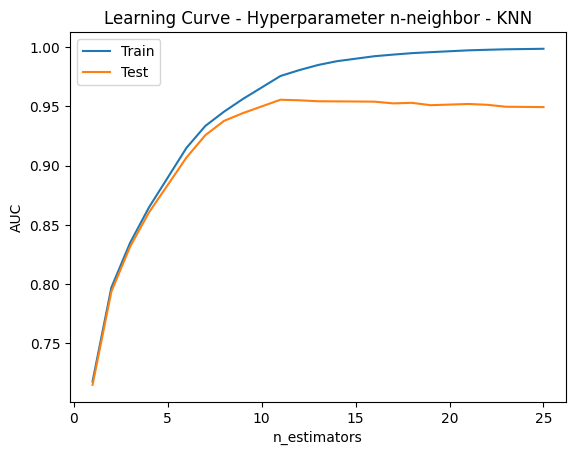

In [27]:
param_values = [int(x) for x in np.linspace(1, 25, 20)]
draw_learning_curve_tree(param_values)

#### Best Result Implementation From Learning Curve

In [28]:
start_time = time.time()

tree_best = DecisionTreeClassifier(max_depth=1,
                              criterion='gini',
                              splitter='best')
tree_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.0462498664855957 ms


In [29]:
ytrain_tree_best_pred = tree_best.predict(X_train)
ytest_tree_best_pred  = tree_best.predict(X_test)

In [30]:
accuracy_tree_best_train = accuracy_score(y_train, ytrain_tree_best_pred)
accuracy_tree_best_test  = accuracy_score(y_test, ytest_tree_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_tree_best_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_tree_best_test)

Accuracy  (Train Set)    : 0.72
Accuracy  (Test Set)     : 0.71


In [70]:
precision_tree_best_train = precision_score(y_train, ytrain_tree_best_pred)
precision_tree_best_test  = precision_score(y_test, ytest_tree_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_tree_best_train)
print("Precision  (Test Set)     : %.2f" % precision_tree_best_test)

Precision  (Train Set)    : 0.68
Precision  (Test Set)     : 0.68


In [71]:
recall_tree_best_train = recall_score(y_train, ytrain_tree_best_pred)
recall_tree_best_test  = recall_score(y_test, ytest_tree_best_pred)
print("Recall  (Train Set)    : %.2f" % recall_tree_best_train)
print("Recall  (Test Set)     : %.2f" % recall_tree_best_test)

Recall  (Train Set)    : 0.82
Recall  (Test Set)     : 0.81


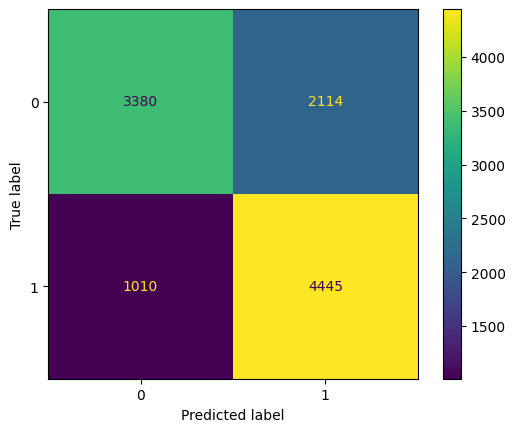

In [32]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_tree_best_pred, labels=tree_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_best.classes_)
disp.plot()
plt.show()

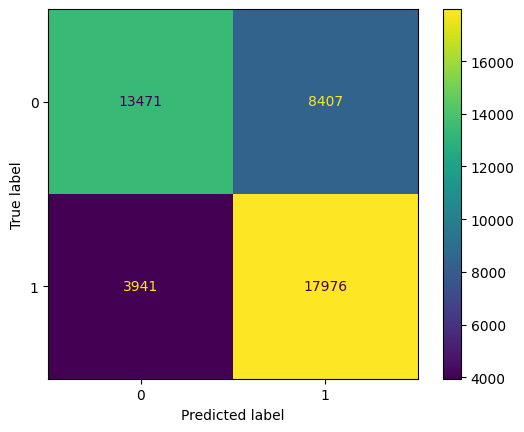

In [33]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_tree_best_pred, labels=tree_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_best.classes_)
disp.plot()
plt.show()

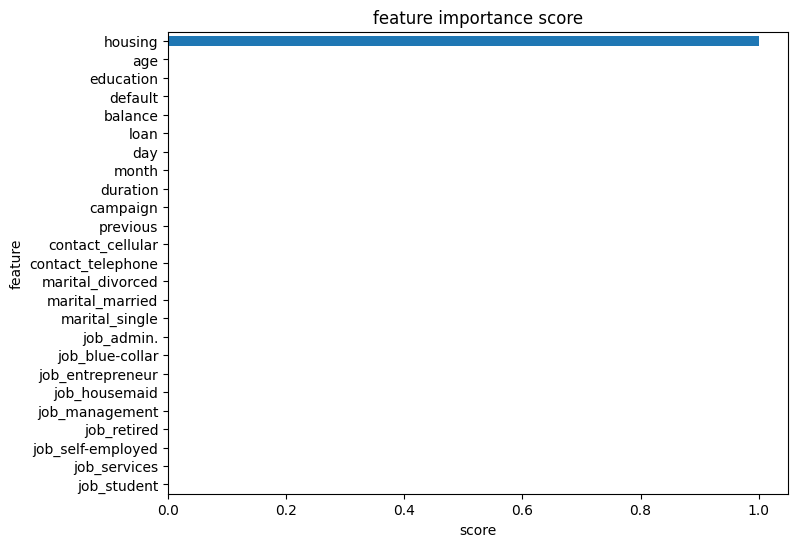

In [35]:
feat_importances = pd.Series(tree_best.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 6))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

### RandomForest

In [36]:
start_time = time.time()

forest = RandomForestClassifier(n_estimators=100,
                                max_depth=None,
                                min_samples_split=2,
                                criterion='gini')
forest.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 3.820781707763672 ms


In [37]:
ytrain_forest_pred = forest.predict(X_train)
ytest_forest_pred  = forest.predict(X_test)

In [38]:
accuracy_forest_train = accuracy_score(y_train, ytrain_forest_pred)
accuracy_forest_test  = accuracy_score(y_test, ytest_forest_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_forest_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_forest_test)

Accuracy  (Train Set)    : 1.00
Accuracy  (Test Set)     : 0.96


In [39]:
precision_forest_train = precision_score(y_train, ytrain_forest_pred)
precision_forest_test  = precision_score(y_test, ytest_forest_pred)
print("Precision  (Train Set)    : %.2f" % precision_forest_train)
print("Precision  (Test Set)     : %.2f" % precision_forest_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.95


In [72]:
recall_forest_train = recall_score(y_train, ytrain_forest_pred)
recall_forest_test  = recall_score(y_test, ytest_forest_pred)
print("Precision  (Train Set)    : %.2f" % recall_forest_train)
print("Precision  (Test Set)     : %.2f" % recall_forest_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.97


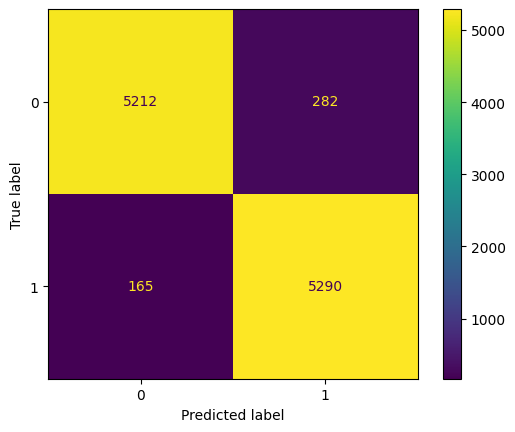

In [40]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_forest_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

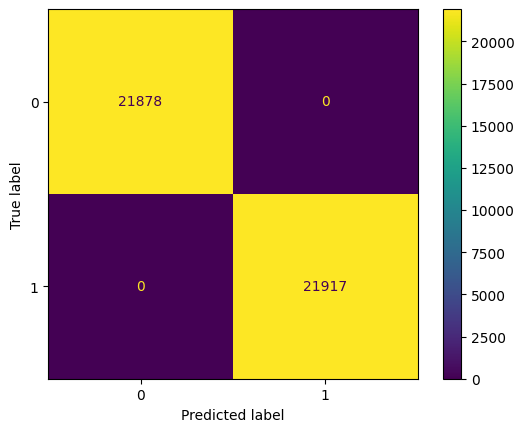

In [41]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_forest_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [42]:
n_estimators = [50, 100, 200]
max_depth = [None, 5, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [43]:
start_time = time.time()

random_forest = RandomForestClassifier()
forest_grid = GridSearchCV(random_forest, param_grid, cv=10)
forest_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 250.0227451324463 ms


In [44]:
print("\nBest: %f using %s" % (forest_grid.best_score_, forest_grid.best_params_))


Best: 0.961525 using {'max_depth': None, 'n_estimators': 200}


In [45]:
ytrain_forest_grid_pred = forest_grid.predict(X_train)
ytest_forest_grid_pred  = forest_grid.predict(X_test)

In [46]:
accuracy_forest_grid_train = accuracy_score(y_train, ytrain_forest_grid_pred)
accuracy_forest_grid_test  = accuracy_score(y_test, ytest_forest_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_forest_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_forest_test)

Accuracy  (Train Set)    : 1.00
Accuracy  (Test Set)     : 0.96


In [47]:
precision_forest_grid_train = precision_score(y_train, ytrain_forest_grid_pred)
precision_forest_grid_test  = precision_score(y_test, ytest_forest_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_forest_train)
print("Precision  (Test Set)     : %.2f" % precision_forest_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.95


In [73]:
recall_forest_grid_train = recall_score(y_train, ytrain_forest_grid_pred)
recall_forest_grid_test  = recall_score(y_test, ytest_forest_grid_pred)
print("Recall  (Train Set)    : %.2f" % recall_forest_grid_train)
print("Recall  (Test Set)     : %.2f" % recall_forest_grid_test)

Recall  (Train Set)    : 1.00
Recall  (Test Set)     : 0.97


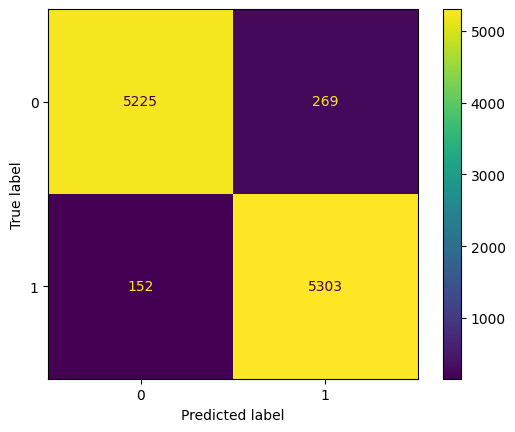

In [48]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_forest_grid_pred, labels=forest_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_grid.classes_)
disp.plot()
plt.show()

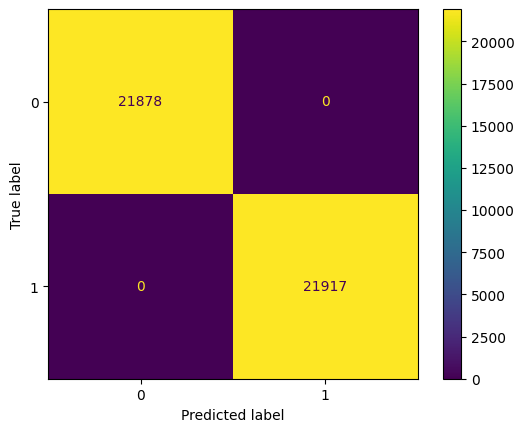

In [49]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_forest_grid_pred, labels=forest_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 1; train: 0.9657673395481028; test: 0.8982250614535915
param value: 22; train: 0.9999987935352493; test: 0.9922357595670572
param value: 43; train: 0.9999999749739378; test: 0.9931547355885614
param value: 64; train: 0.9999999885297214; test: 0.992848743917621
param value: 85; train: 1.0; test: 0.9936473986954186
param value: 106; train: 1.0; test: 0.9934259088408085
param value: 127; train: 1.0; test: 0.9936281626452255
param value: 148; train: 1.0; test: 0.9938805836681429
param value: 169; train: 1.0; test: 0.9935927603048005
param value: 190; train: 1.0; test: 0.9938275969418517
param value: 211; train: 1.0; test: 0.9936500513684289
param value: 232; train: 0.9999999999999999; test: 0.9938028386604235
param value: 253; train: 1.0; test: 0.9937566421096992
param value: 274; train: 1.0; test: 0.9937630485652709
param value: 295; train: 1.0; test: 0.9937939129996659
param value: 316; train: 1.0; test: 0.9937458645828781
param value: 337; train: 1.0; test: 0.99387544515690

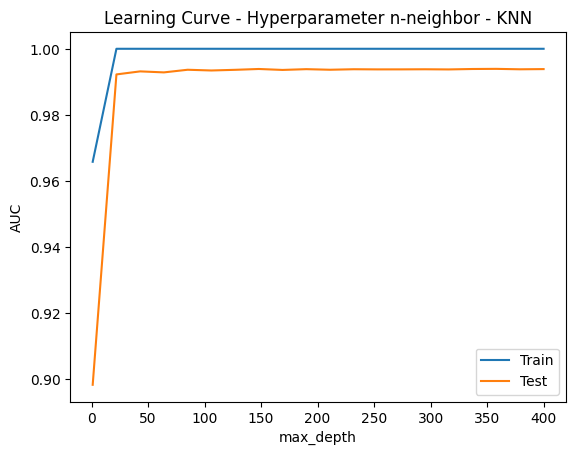

In [66]:
param_values = [int(x) for x in np.linspace(1, 400, 20)]
draw_learning_curve_forest(param_values)

#### Best Result Implementation From Learning Curve

In [51]:
start_time = time.time()

forest_best = RandomForestClassifier(max_depth=None,
                              criterion='gini',
                              n_estimators=242,
                              min_samples_split=2)
forest_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 9.24151086807251 ms


In [52]:
ytrain_forest_best_pred = forest_best.predict(X_train)
ytest_forest_best_pred  = forest_best.predict(X_test)

In [53]:
accuracy_forest_best_train = accuracy_score(y_train, ytrain_forest_best_pred)
accuracy_forest_best_test  = accuracy_score(y_test, ytest_forest_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_forest_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_forest_test)

Accuracy  (Train Set)    : 1.00
Accuracy  (Test Set)     : 0.96


In [54]:
precision_forest_best_train = precision_score(y_train, ytrain_forest_best_pred)
precision_forest_best_test  = precision_score(y_test, ytest_forest_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_forest_train)
print("Precision  (Test Set)     : %.2f" % precision_forest_test)

Precision  (Train Set)    : 1.00
Precision  (Test Set)     : 0.95


In [74]:
recall_forest_best_train = recall_score(y_train, ytrain_forest_best_pred)
recall_forest_best_test  = recall_score(y_test, ytest_forest_best_pred)
print("Recall  (Train Set)    : %.2f" % recall_forest_best_train)
print("Recall  (Test Set)     : %.2f" % recall_forest_best_test)

Recall  (Train Set)    : 1.00
Recall  (Test Set)     : 0.97


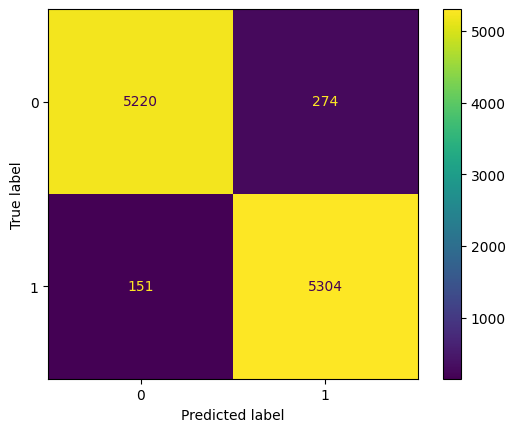

In [55]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_forest_best_pred, labels=forest_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_best.classes_)
disp.plot()
plt.show()

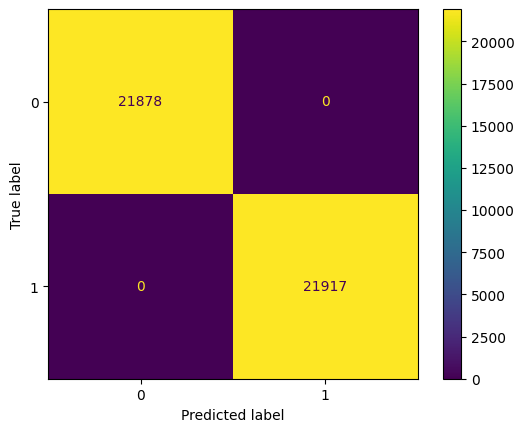

In [56]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_forest_best_pred, labels=forest_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_best.classes_)
disp.plot()
plt.show()

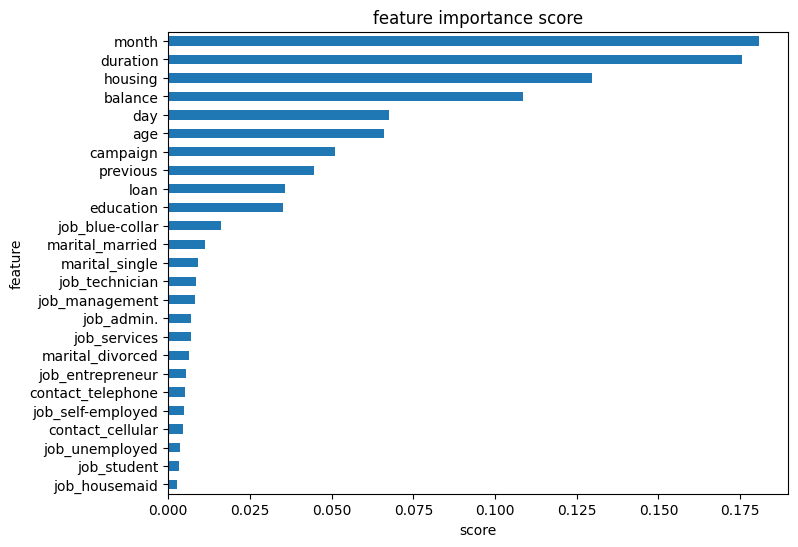

In [58]:
feat_importances = pd.Series(forest_best.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 6))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

In [99]:
X_test.columns.to_list()

['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'previous',
 'contact_cellular',
 'contact_telephone',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed']

In [107]:
# visalualize tree

iris = load_iris()
iris.target = y_test
iris.data = X_test
iris.feature_names = X_test.columns.to_list()
iris.target_names = ['yes','no']

# Model (can also use single decision tree)

# Train
forest.fit(iris.data, iris.target)
# Extract single tree
estimator = forest.estimators_[1]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [118]:
dot_data = tree.export_graphviz(tree_best, out_file='decision_tree.dot', 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)